In [59]:
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

data = sns.load_dataset("tips")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


By sex analysis

Text(0.5, 1.0, 'Split by sex')

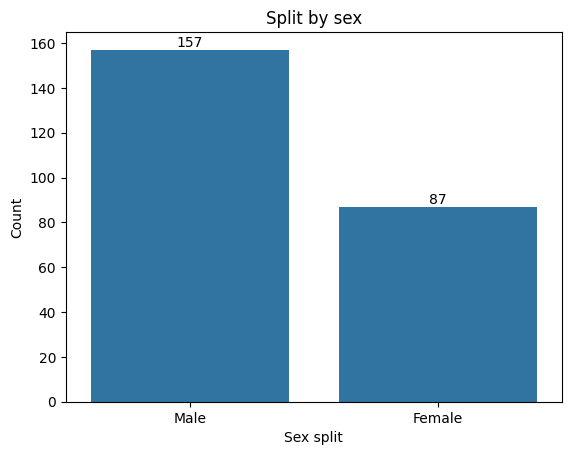

In [61]:
#Amount of males and females
ax = sns.countplot(data, x=data.sex);
ax.bar_label(ax.containers[0])
plt.xlabel('Sex split')
plt.ylabel('Count')
plt.title('Split by sex')


In [62]:
by_sex = data.sex.value_counts()
by_sex

sex
Male      157
Female     87
Name: count, dtype: int64

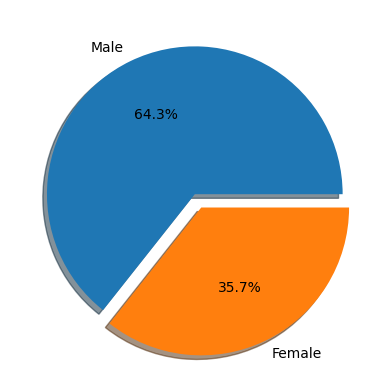

In [79]:
explode = (0, 0.1)
plt.pie(by_sex, labels = by_sex.index, explode=explode, autopct='%1.1f%%', shadow=True);

Text(0.5, 1.0, 'Smokers by sex')

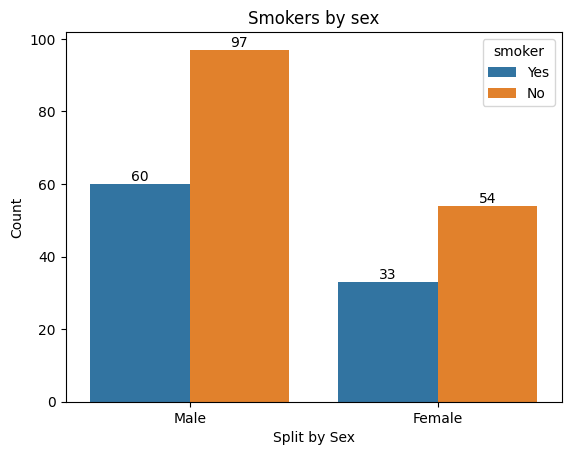

In [63]:
ax = sns.countplot(data, x=data.sex, hue=data.smoker);
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xlabel('Split by Sex')
plt.ylabel('Count')
plt.title('Smokers by sex')

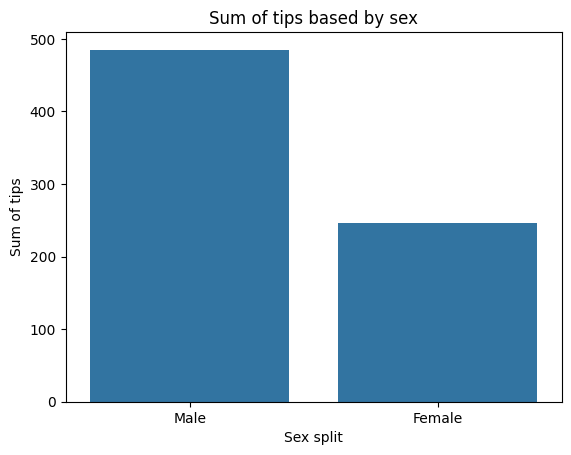

In [65]:
#By sex
ax = sns.barplot(data, x=data.sex, y=data.tip, estimator='sum', errorbar=None)
plt.xlabel('Sex split')
plt.ylabel('Sum of tips')
plt.title('Sum of tips based by sex')
plt.show()


In [80]:
data.day.value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [100]:
by_day = data.groupby([data.day, data.sex, data.smoker])['tip'].sum().reset_index().round()
by_day

/var/folders/bj/p18ygv1s6wbg6865d00fd5h80000gn/T/ipykernel_10841/226965635.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_day = data.groupby([data.day, data.sex, data.smoker])['tip'].sum().reset_index().round()


,day,sex,smoker,tip
0,Thur,Male,Yes,31.0
1,Thur,Male,No,59.0
2,Thur,Female,Yes,21.0
3,Thur,Female,No,61.0
4,Fri,Male,Yes,22.0
5,Fri,Male,No,5.0
6,Fri,Female,Yes,19.0
7,Fri,Female,No,6.0
8,Sat,Male,Yes,78.0
9,Sat,Male,No,104.0


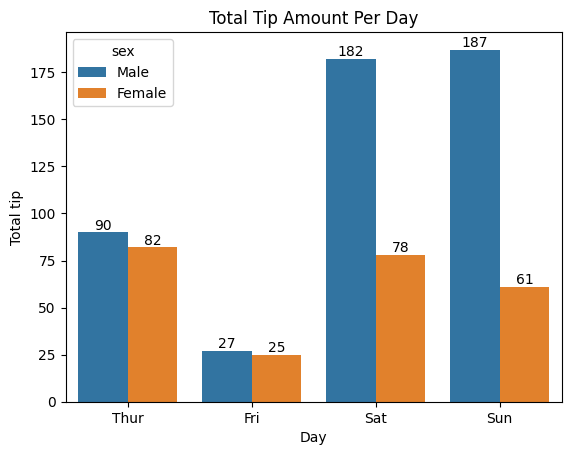

In [115]:
ax = sns.barplot(by_day, x='day', y='tip', hue='sex', estimator=sum, errorbar=None)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Day')
plt.ylabel('Total tip')
plt.title('Total Tip Amount Per Day')
plt.show()